# Traffic Sign Classification
---
**What does this Project do?**
- This project builds up a program to automatically classifies the traffic signs

**What is the Business Impact & Purpose of this Project?**
- This project can be used in self-driving cars which can help them recognize traffic signs automatically
- It can also be used in the driver alert system inside smart cars that will help and protect drivers by understanding the traffic signs around them
- It provides a Convolutional Neural Network model to solve multi-class classification problems 

**How to Build Up this Project?**

1. Get the datasource from kaggle
2. Preprocessing the images and show visuals
3. Resize the images based on the mean of their dimensions
4. Convert the images into a numpy array and normalize them
5. Check the Class Imbalance
6. Splitting the data and perform one-hot encoding
7. Creating the model architecture, compiling the model and then fitting it
8. Plotting the accuracy and loss scores against each epoch
9. Preprocessing the test data and make predictions on it
10. Visualize the original and predicted labels for the test images
---

## Download the dataset from Kaggle using Kaggle account token

In [1]:
## Install the Kaggle API client.
# !pip install -q kaggle

# # Move kaggle.json as the Kaggle API client expects this file to be in ~/.kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# # This permissions change avoids a warning on Kaggle tool startup.
# !chmod 600 ~/.kaggle/kaggle.json

# # Searching for dataset
# !kaggle datasets list -s gtsrb-german-traffic-sign

# # Downloading dataset and coming out of directory
# !kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
# %cd ..

# # Unzipping downloaded file and removing unusable file

# # !unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
# !rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
# !rm -rf traffic_sign_dataset/Meta
# !rm -rf traffic_sign_dataset/meta
# !rm -rf traffic_sign_dataset/test
# !rm -rf traffic_sign_dataset/train
# !rm traffic_sign_dataset/Meta.csv

## Project Set Up

In [2]:
# Import libraries

import os
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from PIL import Image

from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

## Data Preprocessing

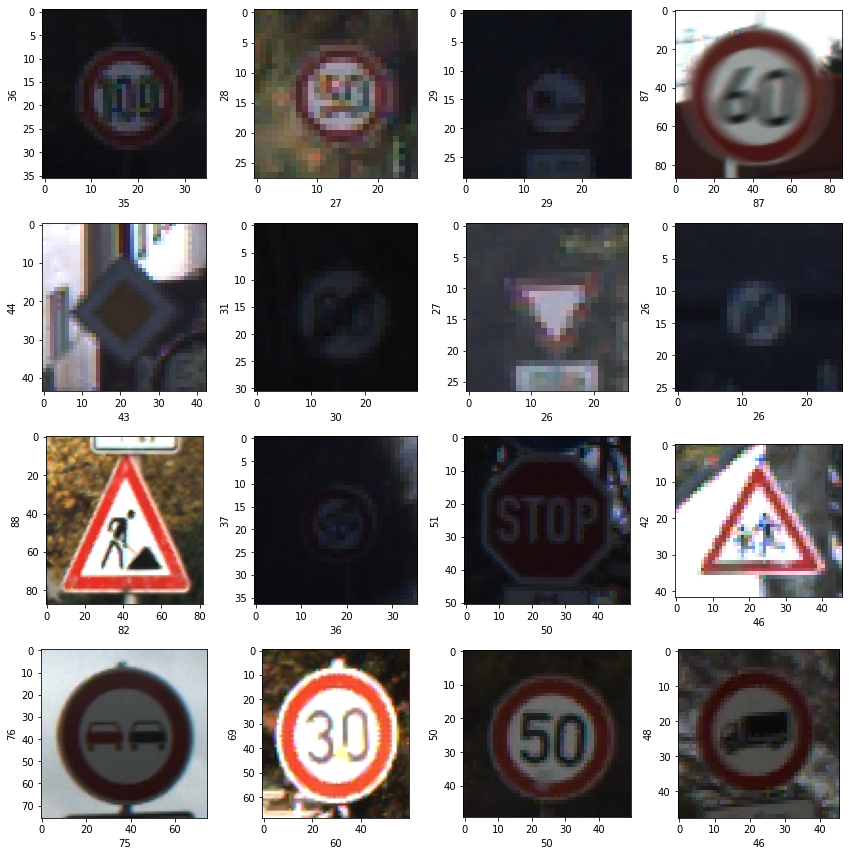

In [3]:
# Plotting 12 images randomlly to have a basic look at the dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)  # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)  #  height of image

In [4]:
# Resize the format (width & height) of each image as their sizes are different
dim1 = []
dim2 = []

# Store the dimensions of each image in two separate lists
for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [5]:
# Calculate the mean of each dimension
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [6]:
# Reshape the images based on previous calculation
images = []
label_id = []

# Store the resized images and labels into two lists
for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [18]:
# Convert images into numpy array
images = np.array(images)

# Normalize the images
# The pixel value of each image ranges between 0 and 255
# Dividing each image by 255 will scale the values between 0 and 1
images = images/255 

In [8]:
# Convert the labels into numpy array and check their shape
label_id = np.array(label_id)
label_id.shape

(39209,)

In [9]:
images.shape

(39209, 50, 50, 3)

> From the shape of the image & labels, it is found that
> - There are 39209 images
> - Each image has a shape of (50, 50, 3)

In [10]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

> - From the observation of images per class, we can check whether the data is balanced or not
> - From the result we can say that data is balanced.

## Split Data into Training & Testing Groups for DL Model

In [11]:
# Split the data into 80% training and 20% testing sets
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [12]:
# Use the built-in function of keras for one-hot encoding
# Converting the classes column into categorical using to_categorical() function.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

> What is `one-hot encoding`?
> - One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
> - [Detailed Explain](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

## Build Up the Convolutional Neural Network Model

In [13]:
# Define the model architecture
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

Metal device set to: Apple M1 Pro


2022-05-25 00:10:19.614284: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-25 00:10:19.614382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
# Compiling the model using metrics, optimizer and loss as required
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

## Feed the Model and Evaluation

In [15]:
model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

2022-05-25 00:10:20.034754: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-25 00:10:20.180201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20


2022-05-25 00:10:27.934961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


246/246 - 9s - loss: 2.3391 - accuracy: 0.3562 - val_loss: 1.0690 - val_accuracy: 0.7488 - 9s/epoch - 35ms/step
Epoch 2/20
246/246 - 8s - loss: 0.8685 - accuracy: 0.7356 - val_loss: 0.3652 - val_accuracy: 0.9178 - 8s/epoch - 32ms/step
Epoch 3/20
246/246 - 8s - loss: 0.4727 - accuracy: 0.8550 - val_loss: 0.1880 - val_accuracy: 0.9652 - 8s/epoch - 32ms/step
Epoch 4/20
246/246 - 8s - loss: 0.3308 - accuracy: 0.8994 - val_loss: 0.1445 - val_accuracy: 0.9742 - 8s/epoch - 32ms/step
Epoch 5/20
246/246 - 8s - loss: 0.2616 - accuracy: 0.9212 - val_loss: 0.1022 - val_accuracy: 0.9801 - 8s/epoch - 32ms/step
Epoch 6/20
246/246 - 8s - loss: 0.2129 - accuracy: 0.9351 - val_loss: 0.0844 - val_accuracy: 0.9815 - 8s/epoch - 32ms/step
Epoch 7/20
246/246 - 8s - loss: 0.1877 - accuracy: 0.9430 - val_loss: 0.0900 - val_accuracy: 0.9818 - 8s/epoch - 32ms/step
Epoch 8/20
246/246 - 8s - loss: 0.1656 - accuracy: 0.9501 - val_loss: 0.0645 - val_accuracy: 0.9860 - 8s/epoch - 32ms/step
Epoch 9/20
246/246 - 8s - l

<AxesSubplot:>

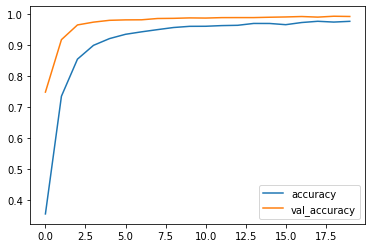

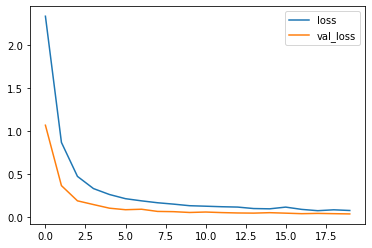

In [16]:
# Visualize the accuracy and loss per epoch
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

> - Here we can see the accuracy and loss scores to have a general understanding of the model performance
> - Then we can also go back to adjust the parameters of the model to optimize it

In [17]:
test_path = 'traffic_sign_dataset/Test'
# !rm traffic_sign_dataset/Test/GT-final_test.csv

In [19]:
# Create a function to resize the test images converting them into a numpy array and normalize them
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    # Converting images into numpy array
    images = np.array(images)
    
    # Normalize the images
    # The pixel value of each image ranges between 0 and 255
    # Dividing each image by 255 will scale the values between 0 and 1
    images = images/255

    return images

In [20]:
# Call the function to scale the test images
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [21]:
# Read label ids from Test.csv and store the values of the class id in y_test variable
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [22]:
# Use the model to make predictions on our test images and save them in y_pred.

# TensorFlow > 2.6
y_pred=model.predict(test_images) 
y_pred=np.argmax(y_pred,axis=1)

# TensorFlow <= 2.5
# y_pred = model.predict_classes(test_images);
# y_pred

2022-05-25 00:15:53.316597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [23]:
# Store the labels according to the image classes.
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

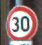

In [24]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [25]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [26]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)


In [27]:
# Create a function to show the test result with original and predicted labels
def check_original_predicted_label(num):
    print(f"--- {num} image ---")
    number_str = str(num)
    format_num = number_str.zfill(5)
    
    img = Image.open(test_path + f'/{format_num}.png')
    display(img)
    
    original_label = all_lables[y_test[int(format_num)]]
    predicted_label = all_lables[y_pred[int(format_num)]]
    result = "Correct" if original_label==predicted_label else "Wrong"
    
    print("Result ---", result)
    print("Original label --- ",original_label)
    print("Predicted label --- ",predicted_label)
    print("\n")

--- 0 image ---


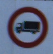

Result --- Correct
Original label ---  Vechiles over 3.5 metric tons prohibited
Predicted label ---  Vechiles over 3.5 metric tons prohibited


--- 1 image ---


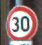

Result --- Correct
Original label ---  Speed limit (30km/h)
Predicted label ---  Speed limit (30km/h)


--- 2 image ---


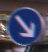

Result --- Correct
Original label ---  Keep right
Predicted label ---  Keep right


--- 3 image ---


Result --- Correct
Original label ---  Turn right ahead
Predicted label ---  Turn right ahead


--- 4 image ---


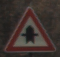

Result --- Correct
Original label ---  Right-of-way at the next intersection
Predicted label ---  Right-of-way at the next intersection


--- 5 image ---


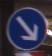

Result --- Correct
Original label ---  Keep right
Predicted label ---  Keep right


--- 6 image ---


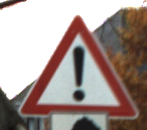

Result --- Correct
Original label ---  General caution
Predicted label ---  General caution


--- 7 image ---


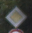

Result --- Correct
Original label ---  Priority road
Predicted label ---  Priority road


--- 8 image ---


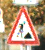

Result --- Correct
Original label ---  Road work
Predicted label ---  Road work


--- 9 image ---


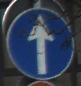

Result --- Correct
Original label ---  Ahead only
Predicted label ---  Ahead only


--- 10 image ---


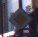

Result --- Correct
Original label ---  Priority road
Predicted label ---  Priority road


--- 11 image ---


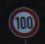

Result --- Correct
Original label ---  Speed limit (100km/h)
Predicted label ---  Speed limit (100km/h)


--- 12 image ---


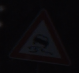

Result --- Correct
Original label ---  Slippery road
Predicted label ---  Slippery road


--- 13 image ---


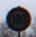

Result --- Correct
Original label ---  Speed limit (100km/h)
Predicted label ---  Speed limit (100km/h)


--- 14 image ---


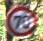

Result --- Correct
Original label ---  Speed limit (70km/h)
Predicted label ---  Speed limit (70km/h)


--- 15 image ---


Result --- Correct
Original label ---  No passing
Predicted label ---  No passing


--- 16 image ---


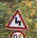

Result --- Correct
Original label ---  Double curve
Predicted label ---  Double curve


--- 17 image ---


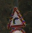

Result --- Correct
Original label ---  Dangerous curve to the right
Predicted label ---  Dangerous curve to the right


--- 18 image ---


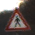

Result --- Correct
Original label ---  Pedestrians
Predicted label ---  Pedestrians


--- 19 image ---


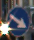

Result --- Correct
Original label ---  Keep right
Predicted label ---  Keep right




In [28]:
for i in range(20):
    check_original_predicted_label(i)